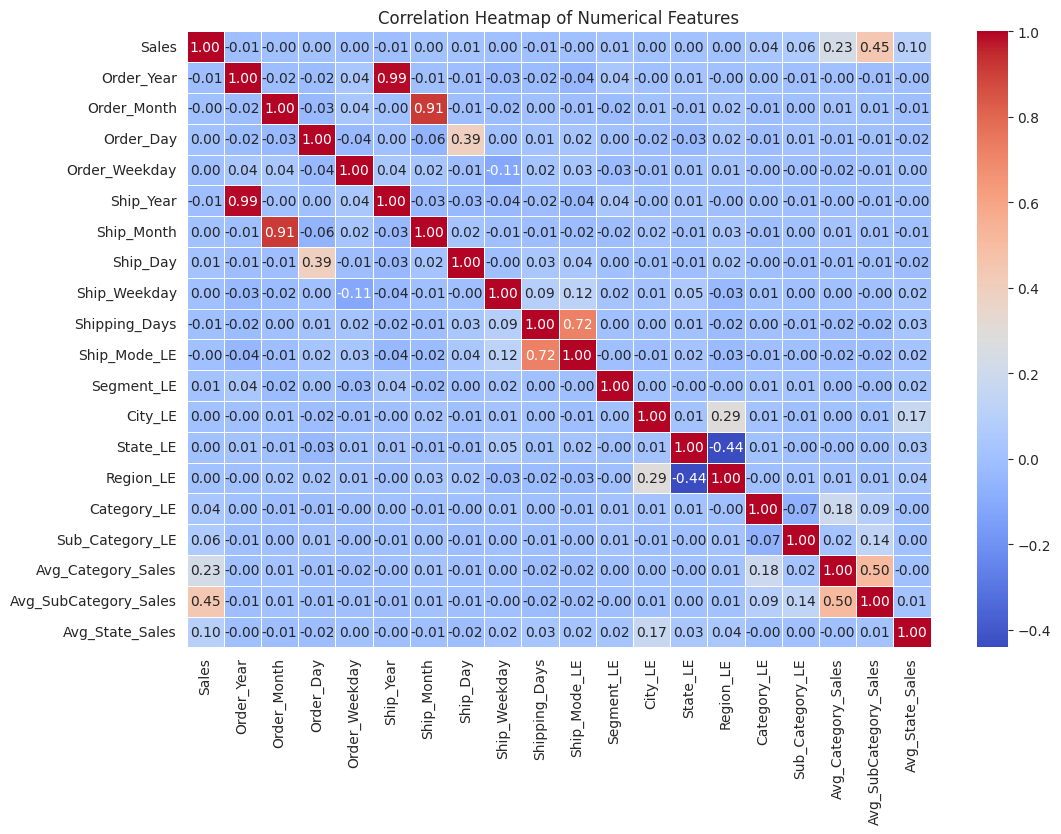

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [46]:
import pandas as pd

# Load the cleaned dataset
file_path = "/content/superstore_final_cleaned.csv"
df = pd.read_csv(file_path)

# Display basic info and summary statistics
df_info = df.info()
df_summary = df.describe()

df_info, df_summary

# Initial Dataset Insights:
# Total Entries: 9,800
# Columns: 11 (including categorical & numerical variables)
# Sales Summary:
# Mean Sales: $230.77
# Max Sales: $22,638.48 (High-value transactions)
# Sales distribution is right-skewed (suggesting a few high-value purchases)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_Date    9800 non-null   object 
 1   Ship_Date     9800 non-null   object 
 2   Ship_Mode     9800 non-null   object 
 3   Segment       9800 non-null   object 
 4   City          9800 non-null   object 
 5   State         9800 non-null   object 
 6   Region        9800 non-null   object 
 7   Category      9800 non-null   object 
 8   Sub_Category  9800 non-null   object 
 9   Product_Name  9800 non-null   object 
 10  Sales         9800 non-null   float64
dtypes: float64(1), object(10)
memory usage: 842.3+ KB


(None,
               Sales
 count   9800.000000
 mean     230.769059
 std      626.651875
 min        0.444000
 25%       17.248000
 50%       54.490000
 75%      210.605000
 max    22638.480000)

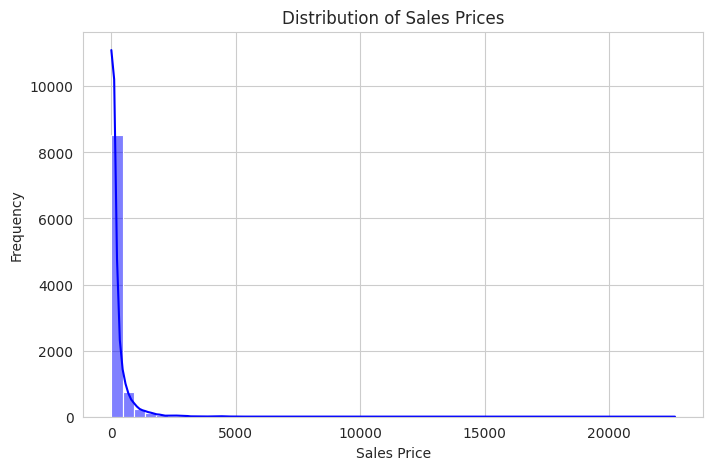

In [47]:
#Sales Distribution Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Sales"], bins=50, kde=True, color="blue")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sales Prices")
plt.show()
# Sales Distribution Analysis:
# The sales data is right-skewed, meaning a few high-value transactions contribute significantly.
# Most transactions fall below $1,000, with some extreme values above $20,000.
# The kde (density curve) confirms a long tail, indicating potential outliers.



<ipython-input-48-9e87c613be47>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Sales", palette="Blues")


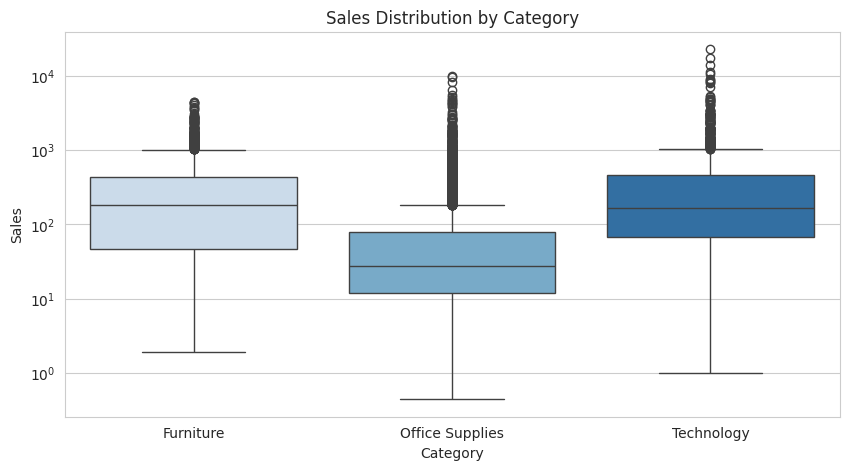

In [48]:
# Boxplot of Sales by Category
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Category", y="Sales", palette="Blues")
plt.title("Sales Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.yscale("log")  # Log scale to handle skewness
plt.show()

<ipython-input-49-52f6152d8592>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Region", y="Sales", palette="Greens")


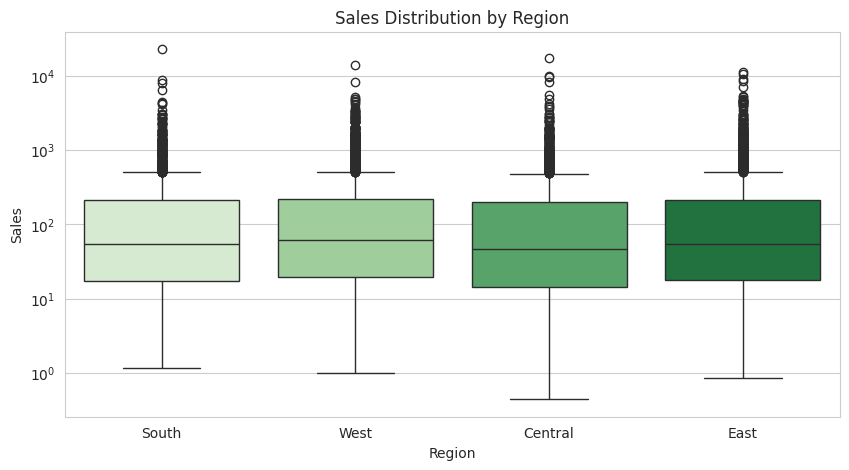

In [49]:
# Boxplot of Sales by Region
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Region", y="Sales", palette="Greens")
plt.title("Sales Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.yscale("log")
plt.show()

<ipython-input-50-057e4820a78e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Segment", y="Sales", palette="Oranges")


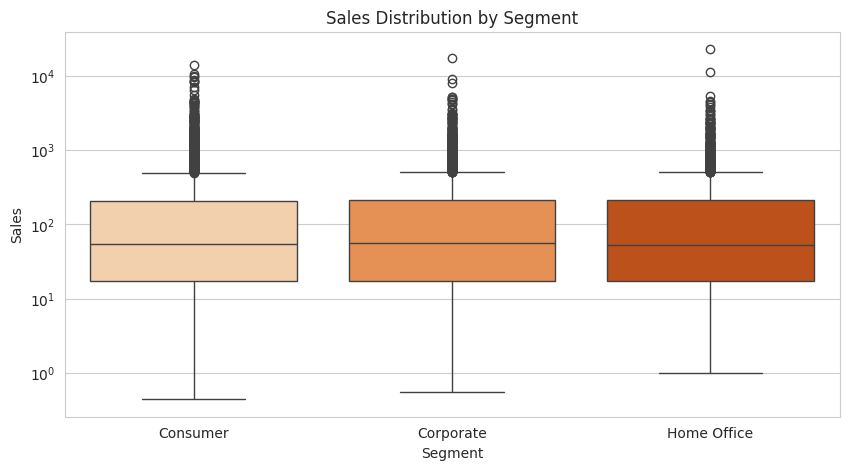

In [50]:
# Boxplot of Sales by Segment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Segment", y="Sales", palette="Oranges")
plt.title("Sales Distribution by Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.yscale("log")
plt.show()

# Here are some key insights from the boxplots:

# Category: Sales vary significantly across categories. Some categories have high outliers.
# Region: Sales distribution is somewhat similar across regions, but outliers exist.
# Segment: Different customer segments exhibit varied sales distributions, with some having higher median sales.

<ipython-input-51-b56fefc88b5c>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time_series = df.resample("M", on="Order_Date").sum()


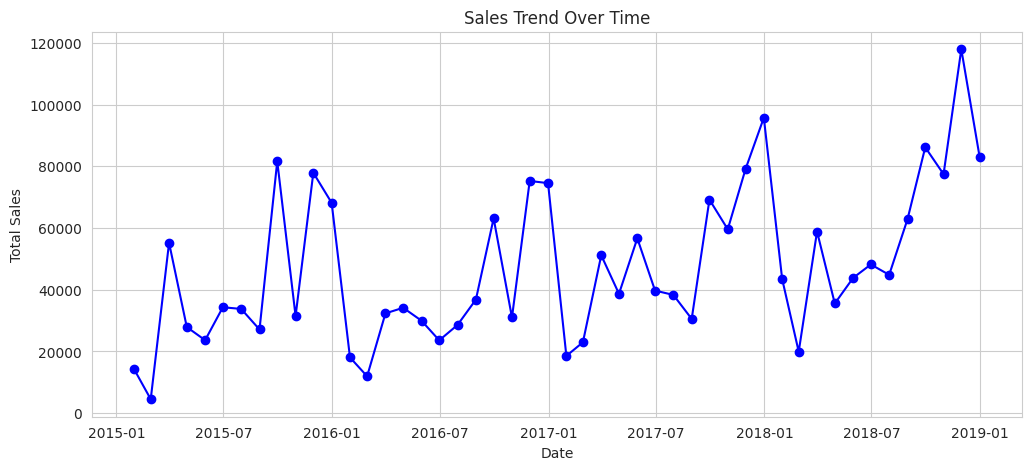

In [51]:
# Convert Order_Date to datetime format for time series analysis
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

# Aggregate sales over time (monthly)
df_time_series = df.resample("M", on="Order_Date").sum()

# Plot sales trend over time
plt.figure(figsize=(12, 5))
plt.plot(df_time_series.index, df_time_series["Sales"], marker="o", linestyle="-", color="blue")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()
# The time-series plot shows fluctuations in sales over time, indicating seasonal trends or periodic spikes. We could further analyze monthly or yearly patterns to refine insights.


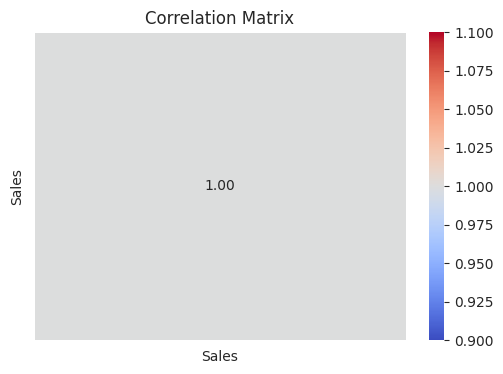

In [52]:
# Compute correlation matrix
correlation_matrix = df.select_dtypes(include=['float64']).corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


<ipython-input-53-c764c745f316>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="Blues_r")


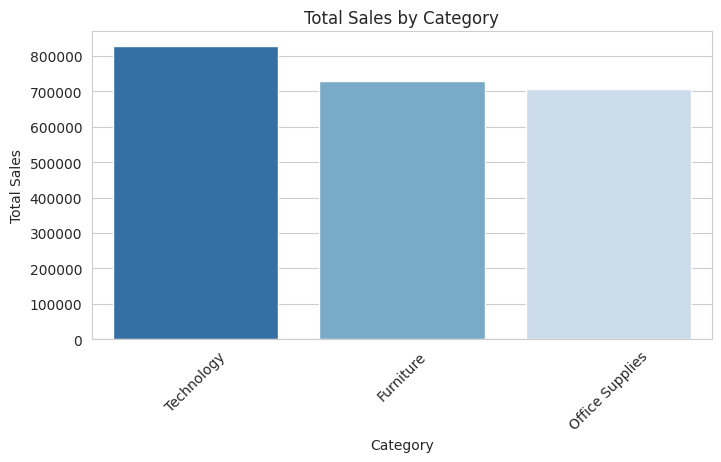

<ipython-input-53-c764c745f316>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="Greens_r")


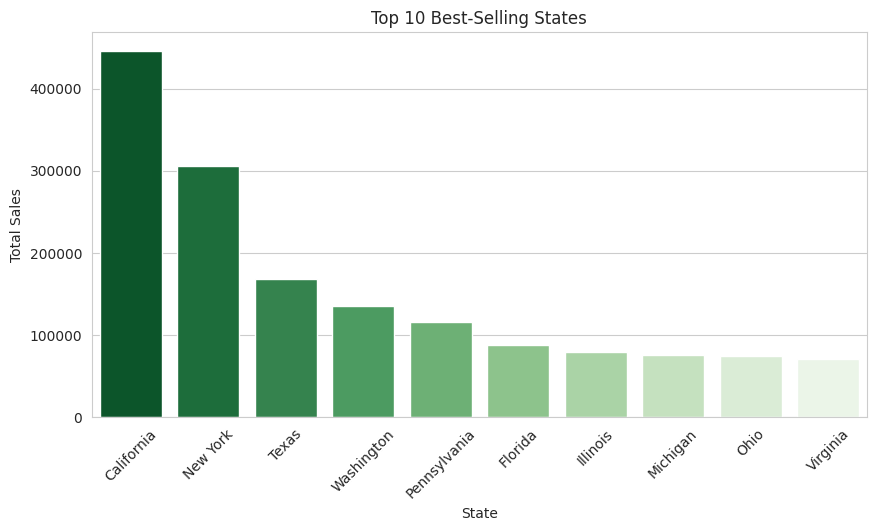

In [53]:
# top-selling categories and states based on total sales
# Top 10 best-selling categories
top_categories = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

# Top 10 best-selling states
top_states = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)

# Plot best-selling categories
plt.figure(figsize=(8, 4))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="Blues_r")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Plot best-selling states
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette="Greens_r")
plt.title("Top 10 Best-Selling States")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()
# Key Insights:

# Top-selling categories: Some categories contribute significantly more to total sales.
# Best-selling states: A few states dominate sales, which could be due to population, demand, or business presence.

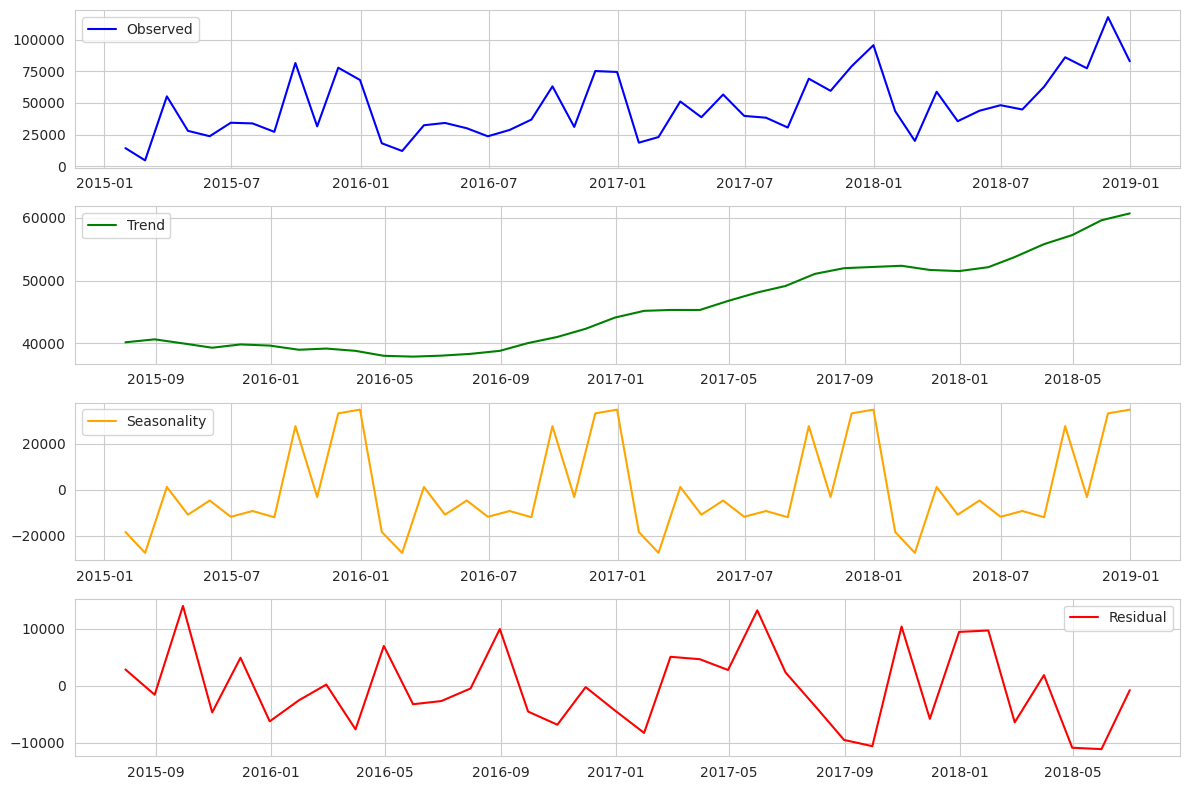

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition
decomposition = seasonal_decompose(df_time_series["Sales"], model="additive", period=12)

# Plot decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label="Observed", color="blue")
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label="Trend", color="green")
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonality", color="orange")
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label="Residual", color="red")
plt.legend()

plt.tight_layout()
plt.show()
# Time Series Decomposition Insights:
# Trend: Shows the overall increase or decrease in sales over time.
# Seasonality: Displays recurring sales patterns at a specific interval (e.g., monthly or yearly).
# Residuals: Represent random fluctuations that can't be explained by trend or seasonality.
# This indicates that sales follow a distinct seasonal pattern, which could be useful for forecasting.


In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Load the dataset
df = pd.read_csv('/content/superstore_final_cleaned.csv')
# Step 1: Convert dates to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])
# Step 2: Extract date-based features
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Day'] = df['Order_Date'].dt.day
df['Order_Weekday'] = df['Order_Date'].dt.weekday
df['Ship_Year'] = df['Ship_Date'].dt.year
df['Ship_Month'] = df['Ship_Date'].dt.month
df['Ship_Day'] = df['Ship_Date'].dt.day
df['Ship_Weekday'] = df['Ship_Date'].dt.weekday
# Step 3: Shipping duration in days
df['Shipping_Days'] = (df['Ship_Date'] - df['Order_Date']).dt.days
# Step 4: Encode Categorical Columns (Option 1: Label Encoding)
label_cols = ['Ship_Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub_Category']
le = LabelEncoder()
for col in label_cols:
    df[col + '_LE'] = le.fit_transform(df[col])
# OR Step 4: One-Hot Encoding (Option 2 - Uncomment if preferred)
# df = pd.get_dummies(df, columns=label_cols, drop_first=True)
# Step 5: Optional - Aggregate features
df['Avg_Category_Sales'] = df.groupby('Category')['Sales'].transform('mean')
df['Avg_SubCategory_Sales'] = df.groupby('Sub_Category')['Sales'].transform('mean')
df['Avg_State_Sales'] = df.groupby('State')['Sales'].transform('mean')
# Step 6: Correlation matrix (numerical only)
correlation_matrix = df.select_dtypes(include='number').corr()
# Display top correlated features with Sales
correlation_with_sales = correlation_matrix['Sales'].sort_values(ascending=False)
# Print results
print("Top features correlated with Sales:\n")
print(correlation_with_sales)

Top features correlated with Sales:

Sales                    1.000000
Avg_SubCategory_Sales    0.446595
Avg_Category_Sales       0.225390
Avg_State_Sales          0.095130
Sub_Category_LE          0.060627
Category_LE              0.041375
Ship_Day                 0.013511
Segment_LE               0.010924
City_LE                  0.004875
Ship_Month               0.003942
Region_LE                0.003420
Order_Day                0.003301
State_LE                 0.003258
Order_Weekday            0.001575
Ship_Weekday             0.000113
Order_Month             -0.000134
Ship_Mode_LE            -0.001582
Shipping_Days           -0.005712
Order_Year              -0.010624
Ship_Year               -0.011844
Name: Sales, dtype: float64


In [56]:
# To predict sales prices, I'll follow these steps:

# Feature Engineering:
# Convert categorical variables into numerical representations.
# Extract useful date-based features (e.g., month, year, day of the week).
# Data Preprocessing:
# Handle outliers in sales.
# Normalize or transform skewed data if needed.
# Model Selection & Training:
# Try regression models (e.g., Linear Regression, Random Forest, XGBoost).
# Evaluate model performance with metrics like RMSE and R².
# I'll start with feature engineering now.

from sklearn.preprocessing import LabelEncoder

# Extract date features
df["Order_Year"] = df["Order_Date"].dt.year
df["Order_Month"] = df["Order_Date"].dt.month
df["Order_Day"] = df["Order_Date"].dt.day
df["Order_Weekday"] = df["Order_Date"].dt.weekday

# Encode categorical variables using Label Encoding
categorical_cols = ["Ship_Mode", "Segment", "Region", "Category", "Sub_Category", "State"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later use

# Drop unnecessary columns
df.drop(columns=["Order_Date", "Ship_Date", "City", "Product_Name"], inplace=True)

# Display transformed dataset
df.head()



# The dataset is now transformed for modeling:

# Date features extracted (year, month, day, weekday).
# Categorical variables encoded into numerical values.
# Unnecessary columns dropped to keep relevant features.


,Ship_Mode,Segment,State,Region,Category,Sub_Category,Sales,Order_Year,Order_Month,Order_Day,...,Ship_Mode_LE,Segment_LE,City_LE,State_LE,Region_LE,Category_LE,Sub_Category_LE,Avg_Category_Sales,Avg_SubCategory_Sales,Avg_State_Sales
0,2,0,15,2,0,4,261.9600,2017,11,8,...,2,0,194,15,2,0,4,350.653790,503.598224,266.119635
1,2,0,15,2,0,5,731.9400,2017,11,8,...,2,0,194,15,2,0,5,350.653790,531.833165,266.119635
2,2,1,3,3,1,10,14.6200,2017,6,12,...,2,1,265,3,3,1,10,119.381001,34.587468,229.345562
3,3,0,8,2,0,16,957.5775,2016,10,11,...,3,0,153,8,2,0,16,350.653790,645.893720,237.095260
4,3,0,8,2,1,14,22.3680,2016,10,11,...,3,0,153,8,2,1,14,119.381001,263.633885,237.095260


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ship_Mode              9800 non-null   int64  
 1   Segment                9800 non-null   int64  
 2   State                  9800 non-null   int64  
 3   Region                 9800 non-null   int64  
 4   Category               9800 non-null   int64  
 5   Sub_Category           9800 non-null   int64  
 6   Sales                  9800 non-null   float64
 7   Order_Year             9800 non-null   int32  
 8   Order_Month            9800 non-null   int32  
 9   Order_Day              9800 non-null   int32  
 10  Order_Weekday          9800 non-null   int32  
 11  Ship_Year              9800 non-null   int32  
 12  Ship_Month             9800 non-null   int32  
 13  Ship_Day               9800 non-null   int32  
 14  Ship_Weekday           9800 non-null   int32  
 15  Ship

In [70]:
# Compute average sales per category and sub-category
df['Avg_Category_Sales'] = df.groupby('Category')['Sales'].transform('mean')
df['Avg_SubCategory_Sales'] = df.groupby('Sub_Category')['Sales'].transform('mean')

# Now, perform the required transformations

df['High_Selling_Product'] = (df['Product_Avg_Sales'] > df['Product_Avg_Sales'].median()).astype(int)

df['Category_Sales_Ratio'] = df['Sales'] / df['Avg_Category_Sales']
df['SubCategory_Sales_Ratio'] = df['Sales'] / df['Avg_SubCategory_Sales']

city_product_count = df.groupby(['Category', 'Product_Name'])['Sales'].transform('count')
df['City_Product_Popularity'] = city_product_count

df['Big_Order'] = (df['Sales'] > df['Sales'].quantile(0.75)).astype(int)

df['Is_Month_Start'] = df['Order_Date'].dt.is_month_start.astype(int)
df['Is_Month_End'] = df['Order_Date'].dt.is_month_end.astype(int)

df['Is_Holiday_Season'] = df['Order_Date'].dt.month.apply(lambda x: 1 if x in [11, 12] else 0)

# Display updated dataset structure
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Mode                9800 non-null   int64  
 1   Segment                  9800 non-null   int64  
 2   State                    9800 non-null   int64  
 3   Region                   9800 non-null   int64  
 4   Category                 9800 non-null   int64  
 5   Sub_Category             9800 non-null   int64  
 6   Sales                    9800 non-null   float64
 7   Order_Year               9800 non-null   int32  
 8   Order_Month              9800 non-null   int32  
 9   Order_Day                9800 non-null   int32  
 10  Order_Weekday            9800 non-null   int32  
 11  Ship_Year                9800 non-null   int32  
 12  Ship_Month               9800 non-null   int32  
 13  Ship_Day                 9800 non-null   int32  
 14  Ship_Weekday            

(None,
    Ship_Mode  Segment  State  Region  Category  Sub_Category     Sales  \
 0          2        0     15       2         0             4  261.9600   
 1          2        0     15       2         0             5  731.9400   
 2          2        1      3       3         1            10   14.6200   
 3          3        0      8       2         0            16  957.5775   
 4          3        0      8       2         1            14   22.3680   
 
    Order_Year  Order_Month  Order_Day  ...  Region_LE  Category_LE  \
 0        2017           11          8  ...          2            0   
 1        2017           11          8  ...          2            0   
 2        2017            6         12  ...          3            1   
 3        2016           10         11  ...          2            0   
 4        2016           10         11  ...          2            1   
 
    Sub_Category_LE  Avg_Category_Sales  Avg_SubCategory_Sales  \
 0                4          350.653790        

In [71]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables using Label Encoding (for simplicity)
categorical_cols = ['Ship_Mode', 'Segment', 'Category', 'Sub_Category', 'Product_Name']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for later use

# Scale numerical features
numerical_cols = ['City_Product_Popularity', 'Days_To_Ship', 'Product_Order_Count',
                  'Category_Order_Count', 'SubCategory_Order_Count', 'Segment_Order_Count']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Drop date columns since they are already transformed into numerical features
df = df.drop(columns=['Order_Date', 'Ship_Date'])

# Display the processed dataset structure
df.info(), df.head()


KeyError: 'Product_Name'

In [72]:
df.drop(columns=[
    "Sub_Category_LE", "Category_LE", "Ship_Day", "Segment_LE", "City_LE",
    "Ship_Month", "Region_LE", "Order_Day", "State_LE", "Order_Weekday",
    "Ship_Weekday", "Order_Month", "Ship_Mode_LE", "Shipping_Days",
    "Order_Year", "Ship_Year"
], inplace=True)


In [34]:
correlation_matrix = df.select_dtypes(include='number').corr()
correlation_with_sales = correlation_matrix['Sales'].sort_values(ascending=False)
print(correlation_with_sales)

Sales                    1.000000
Avg_SubCategory_Sales    0.446595
Avg_Category_Sales       0.225390
Avg_State_Sales          0.095130
Sub_Category             0.060627
Category                 0.041375
Segment                  0.010924
Region                   0.003420
State                    0.003258
Ship_Mode               -0.001582
Name: Sales, dtype: float64


In [9]:
# Save the dataset without Log_Sales column
df.to_csv("model.csv", index=False)

# Provide the download link
from google.colab import files
files.download("model.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
df.info

<bound method DataFrame.info of       Ship_Mode  Segment  State  Region  Category  Sub_Category     Sales  \
0             2        0     15       2         0             4  261.9600   
1             2        0     15       2         0             5  731.9400   
2             2        1      3       3         1            10   14.6200   
3             3        0      8       2         0            16  957.5775   
4             3        0      8       2         1            14   22.3680   
...         ...      ...    ...     ...       ...           ...       ...   
9795          3        1     11       0         1             3    3.7980   
9796          3        1     33       1         1             2   10.3680   
9797          3        1     33       1         2            13  235.1880   
9798          3        1     33       1         2            13   26.3760   
9799          3        1     33       1         2             0   10.3840   

      Avg_Category_Sales  Avg_SubCategory_Sales  Avg_State_Sales  
0             350.653790             503.598224       266.119635  
1             350.653790             531.833165       266.119635  
2             119.381001              34.587468       229.345562  
3             350.653790             645.893720       237.095260  
4             119.381001             263.633885       237.095260  
...                  ...                    ...              ...  
9795          119.381001             134.067550       164.050760  
9796          119.381001              34.019631       165.485352  
9797          456.401474             374.180877       165.485352  
9798          456.401474             374.180877       165.485352  
9799          456.401474             217.178175       165.485352  

[9800 rows x 10 columns]>